# Atividade 4

## Dupla:

* Felipe Getúlio Laranjeira do Nascimento
* Lucas Pereira Reis

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from combination import partitions
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

## Realizando a leitura do *dataset*

In [2]:
df = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
df.columns = ["area","perimeter","compactness",
              "length_kernel","width_kernel","asymmetry_coefficient",
              "length_kernel_groove","variety"]
print(f'Tamanho do dataset: {len(df)}')

Tamanho do dataset: 210


# Analisando o *Dataset*

### 1. Histograma do atributo alvo

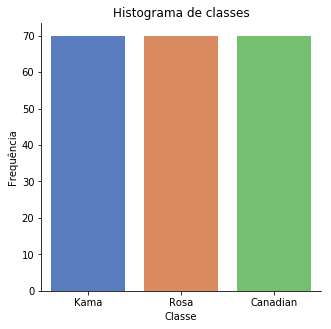

In [3]:
target_name = "variety"
classes_names = ['Kama','Rosa','Canadian']
g = sns.catplot(x=target_name, data=df, kind="count", palette="muted", height=4.5, aspect=1.0)
g.set_xticklabels(classes_names)
g.set_axis_labels("Classe", "Frequência")
plt.title('Histograma de classes')
plt.show()

Conforme pode ser visto no histograma, as classes do atributo alvo são balanceadas, pois o *dataset* possui um total de 210 amostras e cada classe possui 70 amostras.

### 2. Heatmap da correlação de Pearson dos atributos do dataset

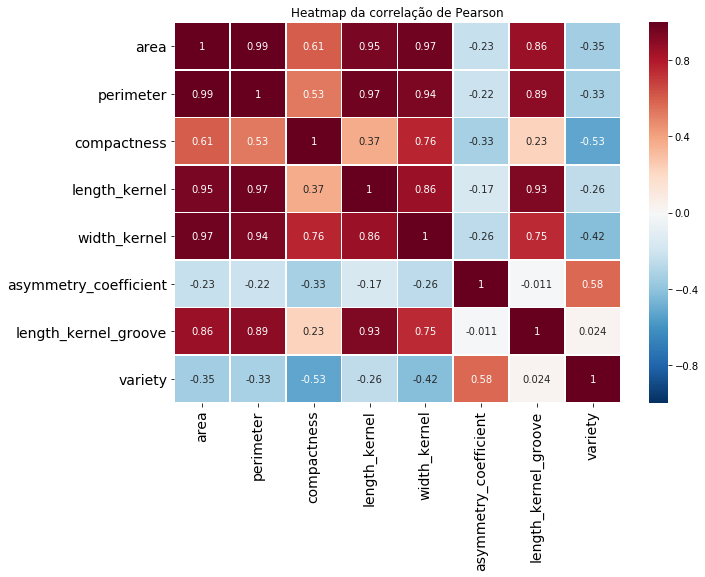

In [4]:
plt.figure(figsize = (10,7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1,linewidths=.5, cmap = "RdBu_r",annot=True)
plt.title('Heatmap da correlação de Pearson')
plt.show()

O *heatmap* acima exibe a correlação de Pearson entre todos os atributos do *dataset*, como pode ser visto o atributo `length_kernel_groove` possui uma correlação de aproximadamente igual a 0 com o atributo alvo `variety`. Assim, optou-se por removê-lo do *dataset*.

In [5]:
df.drop(['length_kernel_groove'],axis=1,inplace=True)

# Pré-Processamento de Dados

Antes de começar a utilizar o `GridSearchCV`, precisa-se primeiramente preparar o *dataset* e alguns atributos para serem utilizados na busca.

In [6]:
target = df.variety
df.drop(['variety'],axis=1,inplace=True)

In [7]:
input_neurons_amount, output_neurons_amount = len(df.columns), 3

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df,target,test_size=0.3)

In [9]:
def hidden_neurons_amount(alpha):
    return alpha * sqrt(input_neurons_amount * output_neurons_amount)

def condition_to_insert(partition):
    return len(partition) <= 4

In [10]:
alpha = [0.5, 2, 3]
hidden_neurons_amounts = [ceil(hidden_neurons_amount(a)) for a in alpha]
hidden_layer_sizes = []

for n in hidden_neurons_amounts:
    tuples = partitions(n, condition_to_insert)
    hidden_layer_sizes += tuples
print(f'Quantidade de possíveis camadas ocultas: {len(hidden_layer_sizes)}')

Quantidade de possíveis camadas ocultas: 396


# Paramêtros/Hiperparamêtros para a busca em grade

Na célula seguinte temos os paramêtros a serem passados para as redes neurais. Para o hiperparamêtro *solver*, optou-se por utilizar apenas o `lbfgs` pois o *dataset* desta atividade possui apenas 210 amostras, caracterizando-o como um *dataset* pequeno. Assim, o *solver* `lbfgs` será mais eficiente e irá convergir mais rápido para o problema.

In [11]:
params = {
    'activation': ['identity', 'logistic','tanh','relu'],
    'hidden_layer_sizes': hidden_layer_sizes,
    'solver': ['lbfgs']
}

# Projetando Redes Neurais através da busca em grade

A acurácia foi selecionada como a métrica de desempenho a ser utilizada para as redes neurais do `GridSearchCV`, e o método de validação cruzada escolhido é o *k-fold* com *k* = 3.

In [12]:
gs = GridSearchCV(MLPClassifier(), params, cv=3, scoring='accuracy', return_train_score=1)

In [13]:
X,y = df,target

In [14]:
gs.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(3,), (1, 2), (2, 1), (1, 1, 1), (9,), (8, 1), (1, 8), (2, 7), (7, 2), (7, 1, 1), (1, 7, 1), (1, 1, 7), (6, 3), (3, 6), (1, 6, 2), (1, 2, 6), (6, 1, 2), (2, 6, 1), (2, 1, 6), (6, 2, 1), (6, 1, 1, 1), (1, 1, 1,..., 4, 2), (2, 4, 4, 3), (3, 3, 4, 3), (3, 3, 3, 4), (4, 3, 3, 3), (3, 4, 3, 3)], 'solver': ['lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_t

In [15]:
print(f'Quantidade de Redes Neurais projetadas: {len(pd.DataFrame(gs.cv_results_))}')

Quantidade de Redes Neurais projetadas: 1584


In [16]:
pd.DataFrame(gs.cv_results_).drop('params', 1).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
448,0.066222,0.000157,0.000348,0.000008,logistic,"(4, 2, 3)",lbfgs,0.972222,0.884058,0.840580,0.900000,0.055063,1,0.847826,0.865248,0.957447,0.890174,0.048098
50,0.058426,0.000354,0.000340,0.000026,identity,"(2, 4, 3)",lbfgs,0.958333,0.927536,0.811594,0.900000,0.063117,1,0.905797,0.914894,0.936170,0.918954,0.012728
353,0.070038,0.002685,0.000395,0.000015,identity,"(2, 4, 5, 2)",lbfgs,0.944444,0.942029,0.797101,0.895238,0.068658,3,0.869565,0.865248,0.957447,0.897420,0.042482
390,0.067096,0.000481,0.000418,0.000053,identity,"(3, 4, 4, 2)",lbfgs,0.944444,0.927536,0.811594,0.895238,0.058921,3,0.898551,0.886525,0.985816,0.923630,0.044245
385,0.068051,0.001706,0.000401,0.000046,identity,"(4, 3, 2, 4)",lbfgs,0.958333,0.927536,0.797101,0.895238,0.069800,3,0.905797,0.886525,0.992908,0.928410,0.046281


Acima temos o *DataFrame* das Redes Neurais projetadas com o `GridSearchCV` ordenadas pelo campo `rank_test_score`, ou seja, está sendo exibido as cinco melhores redes neurais criadas. É possível retornar apenas a melhor rede neural através do campo `best_estimator_`, conforme abaixo.

# Avaliando a melhor Rede Neural

In [17]:
best_model = gs.best_estimator_
print(best_model)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 4, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [18]:
Y_pred = best_model.predict(X_test)

Para esta atividade, será utilizado como métrica a acurácia. Porém também será exibido a matriz de confusão da melhor rede neural apenas para visualizar o seu comportamento.

## Acurácia

In [19]:
accuracy_score(Y_test,Y_pred)

0.9523809523809523

## Matriz de Confusão

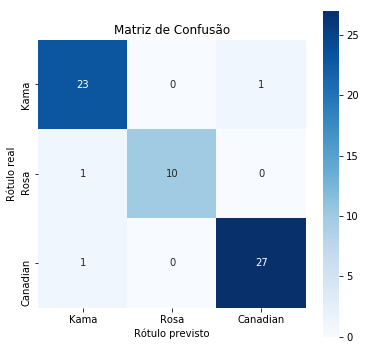

In [20]:
plt.figure(figsize = (6,6))

g = sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,square=True,fmt="d",cmap="Blues")
g.set_xticklabels(classes_names)
g.set_yticklabels(classes_names)
g.set_ylabel('Rótulo real')
g.set_xlabel('Rótulo previsto')
g.set_title('Matriz de Confusão')
plt.show()